In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv')
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv')

In [5]:
x.head()

,Unnamed: 0,0
0,0,1.462108
1,1,1.133769
2,2,-2.301539
3,3,1.744812
4,4,0.042214


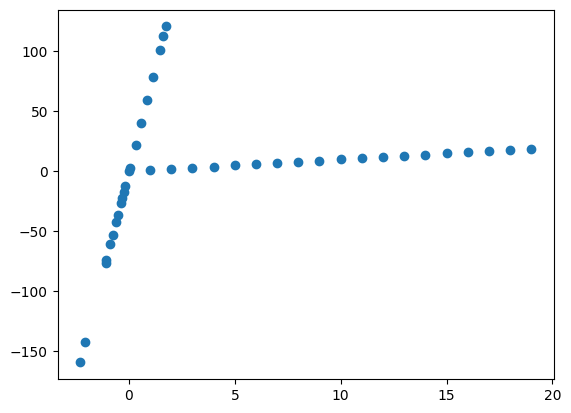

In [6]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [8]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

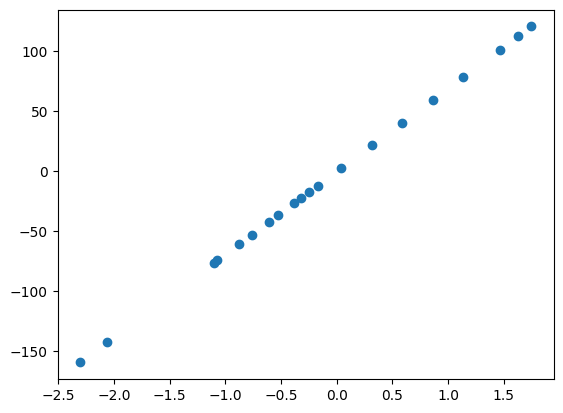

In [9]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [10]:
class Model(object):
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, x):
        return self.b0 + self.b1 * x

    def error(self, X, Y):
        return sum((self.predict(X) - Y)**2) / (2 * len(X))

    def fit(self, X, Y):
        alpha = 0.1
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1

In [11]:
hyp = Model()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print(J)

0
0
2937.6446095153406


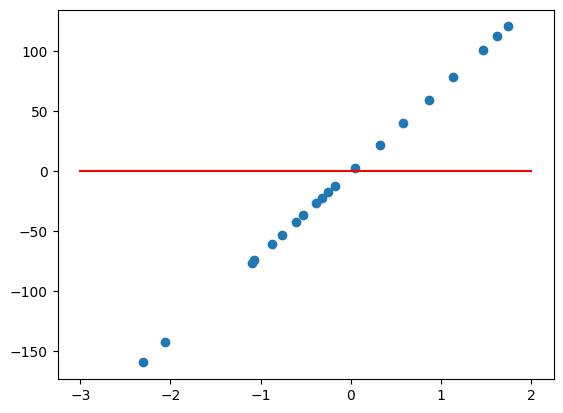

In [12]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class Model(object):

    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return np.sum(((self.predict(X) - Y) ** 2) / (2 * len(X)))

    def fit(self, X, Y, lr=0.001, accuracy=1e-6, max_steps=5000):
        steps, errors = [], []
        step = 0
        prev_err = float('inf')

        for _ in range(max_steps):
            dJ1 = - (2 * np.dot(X.T, (Y) - self.predict(X))) / len(X)
            dJ0 = - (2 * np.sum(y - self.predict(X))) / len(X)

            if step == 0:
                prev_lr = lr
            else:
                if self.error(X, Y) > prev_err:
                    lr /= 2
                prev_lr = lr

            self.b0 -= lr * dJ0
            self.b1 -= lr * dJ1

            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)

            if abs(new_err - prev_err) < accuracy:
                break

            prev_err = new_err

        return steps, errors

    def plot(self, X, Y):
        plt.scatter(X, Y)
        plt.plot(X, self.predict(X), color='red')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.show()


In [14]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 0.00026211604495930744


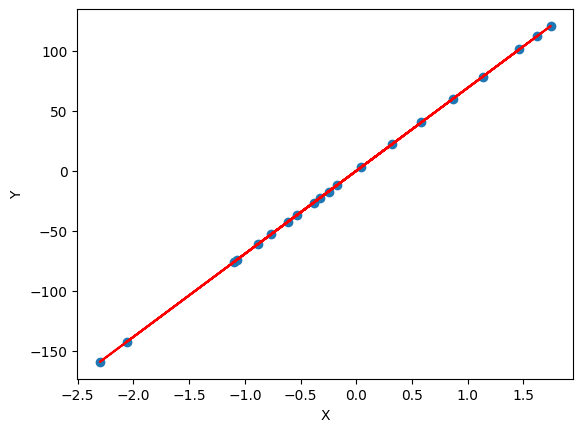

In [ ]:
hyp.plot(x, y)

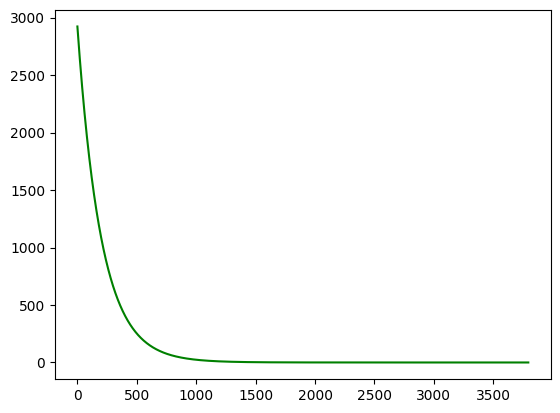

In [ ]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

In [ ]:
x

0     1.462108
1     1.133769
2    -2.301539
3     1.744812
4     0.042214
5    -0.611756
6     0.319039
7    -0.761207
8     0.582815
9    -1.099891
10    0.865408
11    1.624345
12   -0.528172
13   -0.249370
14   -1.072969
15   -0.384054
16   -0.172428
17   -0.322417
18   -2.060141
19   -0.877858
Name: 0, dtype: float64

In [ ]:
y

0     101.159902
1      78.442913
2    -159.238195
3     120.719533
4       2.920673
5     -42.326026
6      22.073585
7     -52.666163
8      40.323651
9     -76.098960
10     59.875573
11    112.384738
12    -36.542995
13    -17.253366
14    -74.236243
15    -26.571842
16    -11.929913
17    -22.307308
18   -142.536421
19    -60.737015
Name: 0, dtype: float64